<a href="https://colab.research.google.com/github/wave010/EDA-Python/blob/main/Machine_Learning_Project_(SC312101).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**รายชื่อสมาชิกกลุ่ม 7**
* 633020393-2 นายถิรวัฒน์ พงษ์สิมา
* 633021005-2 นายศุภกร มุ่งสมัคร
* 633020038-2 ภูดิส แสนทิพย์
* 633020039-0 ภูธเนศ เครือคำ
* 633020410-8 พัฒนศักดิ์ นิเรียงรัมย์

# **Classification**

**ข้อมูล**

ข้อมูลที่ใช้คือ ข้อมูลที่ไว้ระบุชนิดของแก้วจาก UCI ประกอบด้วย 10 แอตทริบิวต์ ต่อแก้ว 7 ประเภท จำนวนข้อมูลมีทั้งหมด 214 แถว [data link](https://www.kaggle.com/datasets/uciml/glass?select=glass.csv) 

ข้อมูลแต่ละแอตทริบิวต์ คือ ❗
1. RI: refractive index (ค่าดัชนีการหักเหของแสง)
2. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
3. Mg: Magnesium
4. Al: Aluminum
5. Si: Silicon
6. K: Potassium
7. Ca: Calcium
8. Ba: Barium
9. Fe: Iron
10. Type of glass: (class attribute) ▶
  * 1 buildingwindowsfloatprocessed 
  * 2 buildingwindowsnonfloatprocessed 
  * 3 vehiclewindowsfloatprocessed
  * 4 vehiclewindowsnonfloatprocessed (none in this database)
  * 5 containers
  * 6 tableware
  * 7 headlamps

กำหนดข้อมูล Input และ Output
* Input : แอตทริบิวต์ 1 - 9 📥
* Output : แอตทริบิวต์ 10 (Type of glass) 📤



รายละเอียดกระบวนการ machine learning ที่ออกแบบมาสำหรับ classification

-- ผลการทำงาน/การวัดประสิทธิภาพ (อาจจะวัดโดยใช้ model 2 ตัว หรือใช้ 1 model แล้วทำการทดลองเปลี่ยนค่า parameter)

-- วิเคราะห์ผล

**เพื่อทำการพยากรณ์ชนิดของแก้ว**

In [ ]:
# download ข้อมูล แล้วอัพลง Google Drive เพื่อให้ง่ายต่อการนำข้อมูลมาใช้งานใน Google Colab
!gdown --id 1GRkFPfDAMM51AYS2g_E69MuOtU2NpV19 #ใช้คำสั่ง !gdown --id <link id> เพื่อโหลดข้อมูลจาก Google Drive

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1GRkFPfDAMM51AYS2g_E69MuOtU2NpV19
To: /content/glass.csv
100% 10.1k/10.1k [00:00<00:00, 16.3MB/s]


In [ ]:
import pandas as pd #import library pandas เพื่อใช้จัดการกับข้อมูลตาราง

glass = pd.read_csv("glass.csv") # อ่านข้อมูลจากไฟล์ เก็บเป็น DataFrame ลงตัวแปร glass 
glass.head() #แสดงข้อมูล 5 แถวแรก

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
glass.shape # ขนาดช้อมูล 

(214, 10)

In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
glass.isna().sum().sort_values() #ตรวจสอบหาข้อมูลที่เป็น null

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

**Model**

ใช้โมเดล 2 ตัวได้แก่  KNeighborsClassifier และ Gaussian Naive Bayes

In [ ]:
#split data ทำการแบ่งข้อมูลออกเป็น 2 ชุด คือ ข้อมูล train (ให้โมเดลเรียนรู้) และ ข้อมูล test (สำหรับทดสอบโมเดล)
from sklearn.model_selection import train_test_split # libraly ที่้ไช้เพื่อแยกข้อมูลออกเป็น 2 ส่วน

X = glass.drop('Type', axis=1) # สำหรับแยกข้อมูล Input
y = glass['Type'] # สำหรับแยกข้อมูล Output

#แยกข้อมูล train, test : ข้อมูล train 70 % และข้อมูล test 30 % 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [ ]:
X_train.shape # ขนาดข้อมูล train

(149, 9)

In [ ]:
X_test.shape # ขนาดข้อมูล test

(65, 9)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score
#Classifier implementing the k-nearest neighbors vote.
from sklearn.neighbors import  KNeighborsClassifier #impor model KNN
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance. z = (x - u) / s
from sklearn.pipeline import Pipeline # Pipeline of transforms with a final estimator.

#create pipe
pipe = Pipeline([
    ('StandardScakaer',StandardScaler()),
    ('KNeighboorClassifier',KNeighborsClassifier(n_neighbors=3))
])

#train data
pipe.fit(X_train,y_train) 

#score
y_predict = pipe.predict(X_test)
print(classification_report(y_test, y_predict))
# ในการพยากรณ์หาชนิดชองแก้ว โดยใช้โมเดล KNeighborsClassifier โดยใช้ตำแหน่งใกล้เคียงเป็นคือ 3 วัดประสิทธิภาพการพยากร์สำหรับข้อมูลทดสอบได้ 72 % 

              precision    recall  f1-score   support

           1       0.59      0.81      0.68        21
           2       0.77      0.77      0.77        26
           3       0.00      0.00      0.00         7
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         7

    accuracy                           0.72        65
   macro avg       0.73      0.68      0.69        65
weighted avg       0.67      0.72      0.69        65



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB #import model

#create pipe
pipe = Pipeline([
    ('StandardScakaer',StandardScaler()),
    ('GaussianNB',GaussianNB())
])

#train data
pipe.fit(X_train,y_train) 

#score
y_predict = pipe.predict(X_test)
print(classification_report(y_test, y_predict))

# ในการพยากรณ์หาชนิดชองแก้ว โดยใช้โมเดล Gaussian Naive Bayes วัดประสิทธิภาพการพยากร์สำหรับข้อมูลทดสอบได้ 46 % 

              precision    recall  f1-score   support

           1       0.39      0.86      0.54        21
           2       0.50      0.12      0.19        26
           3       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       0.88      1.00      0.93         7

    accuracy                           0.46        65
   macro avg       0.41      0.50      0.41        65
weighted avg       0.44      0.46      0.37        65



**วิเคราะห์ผล**

ในการพยากรณ์หาชนิดของแก้ว ซึ่งเป็นข้อมูลที่ได้รับมาจาก kaggle ประกอบด้วย 10 แอตทริบิวต์ ต่อแก้ว 7 ประเภท จำนวนข้อมูลมีทั้งหมด 214 แถว โดยกำหนดข้อมูล input คือ แอตทริบิวต์ RI(refractive index ค่าดัชนีการหักเหของแสง),Na(Sodium), Mg( Magnesium), Al (Aluminum), Si (Silicon), K(Potassium), Ca (Calcium), Ba( Barium), Fe (Iron) และข้อมูล output คือ แอตทริบิวต์ type (ชนิดของแก้ว) ในการพยากรณ์หาชนิดของแก้ว จะใช้โมเดล Classification ในส่วนการเตรียมข้อมูล ขั้นแรกทำความสะอาดข้อมูลคือการตรวจสอบหาค่าว่างข้อมูล ขั้นถัดไปคือการแยกข้อมูลออกเป็น 2 ส่วน คือ ข้อมูลชุดเรียนรู้ 70% และข้อมูลชุดทดสอบ 30% ของข้อมูลทั้งหมด โมเดลที่ใช้ในการเรียนรู้จะใช้ K-Nearest Neighbors Classifier และ Gaussian Naive Bayes ซึ่งมีการรวบรวมการทำงานเป็นขั้นตอนไว้ใน pipeline ขั้นตอนการทำงานในส่วนแรกคือการ แปลงข้อมูลโดยใช้ StandardScaler และส่วนถัดไปคือการ train โมเดลแต่ละตัว ผลจากการวัดประสิทธิภาพของโมเดล K-Nearest Neighbors Classifier ซึ่งใช้ตำแหน่งใกล้ 3 ตำแหน่ง ได้ค่าความแม่นยำ 72 % และวัดประสิทธิภาพของโมเดล Gaussian Naive Bayes ได้ค่าความแม่นยำ 4ุ6 % ดังนั้นการพยากรณ์ชนิดของแก้วโดยใช้โมเดล K-Nearest Neighbors Classifier ซึ่งใช้ตำแหน่งใกล้ 3 ตำแหน่ง และFมเดล Gaussian Naive Bayes ทราบว่า K-Nearest Neighbors Classifier ให้ความแม่นยำในการพยากรณ์ได้ดีกว่าGaussian Naive Bayes

# **Regression**

**ข้อมูล**
ข้อมูลที่ใช้คือ ข้อมูลที่ไว้ระบุคุณภาพของ Red Wine ประกอบด้วย 12 Attribute  จำนวนข้อมูลมีทั้งหมด 1599 แถว https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

ข้อมูลแต่ละ Attribute คือ 
1. fixed acidity (ความเป็นกรดคงที่)
2. volatile acidity (ความเป็นกรดระเหย)
3. citric acid (กรดมะนาม)
4. residual sugar (น้ำตาลตกค้าง)
5. chlorides
6. free sulfur dioxide (ฟรีซัลเฟอร์ไดออกไซด์)
7. total sulfur dioxide (ซัลเฟอร์ไดออกไซด์ทั้งหมด)
8. density (ความหนาแน่น)
9. pH (ค่าที่แสดงความเป็นกรดเป็นเบสของสารเคมีจากปฏิกิริยาของไฮโดรเจนไอออน)
10. sulphates 
11. alcohol (ค่าที่ใช้บ่งชี้ความเข้มข้นของเอทานอล)

Output variable (based on sensory data):
12. quality (score between 0 and 10)

กำหนดข้อมูล Input และ Output
* Input : Attribute 1 - 11 
* Output : Attribute 12 (quality) 

รายละเอียดกระบวนการ machine learning ที่ออกแบบมาสำหรับ Regression

-- ผลการทำงาน/การวัดประสิทธิภาพ (อาจจะวัดโดยใช้ model 2 ตัว หรือใช้ 1 model แล้วทำการทดลองเปลี่ยนค่า parameter)

-- วิเคราะห์ผล

**Import**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

**Dataset**

In [ ]:
! gdown --id 1EKhRT_DcOfOBgfDH2gPlAcO_rtD_zW-E

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1EKhRT_DcOfOBgfDH2gPlAcO_rtD_zW-E
To: /content/winequality-red.csv
100% 101k/101k [00:00<00:00, 52.2MB/s]


In [ ]:
regressdata = pd.read_csv('winequality-red.csv') #อ่านไฟล์ winequality-red.csv
regressdata.head() #แสดงผลตาราง

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
regressdata.shape # Dimension

(1599, 12)

In [ ]:
regressdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
regressdata.isna().sum() # ตรวจสอบค่า Null 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Model**

In [ ]:
from sklearn.model_selection import train_test_split

X = regressdata.drop(regressdata.columns[[0,11]],axis = 1).values # column 1-11
y = regressdata['quality'].values # column 12

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 0) # แยกข้อมูล Train Test

In [ ]:
print('X =\n',X_train)
print('y = \n',y_train)

X =
 [[ 0.49  0.29  2.   ...  2.93  1.98  9.8 ]
 [ 0.18  0.37  0.9  ...  2.89  0.44 12.7 ]
 [ 0.67  0.    1.9  ...  3.4   0.74  9.7 ]
 ...
 [ 0.57  0.31  2.   ...  3.29  0.69  9.5 ]
 [ 0.47  0.49  4.3  ...  3.3   0.68 12.7 ]
 [ 0.98  0.32  2.3  ...  3.25  0.48  9.4 ]]
y = 
 [5 6 5 ... 6 6 5]


In [ ]:
X_train.shape

(1119, 10)

In [ ]:
X_test.shape

(480, 10)

In [ ]:
y_train.shape

(1119,)

In [ ]:
y_test.shape

(480,)

In [ ]:
#MLP Model
from sklearn.neural_network import MLPRegressor 

pipe = Pipeline([
    ('minmax' , MinMaxScaler()),
    ('StandardScakaer',StandardScaler()),
    ('pca' , PCA(n_components=8)),
    ('MLP' , MLPRegressor()),
])
pipe.fit(X_train, y_train)
y_predict = pipe.predict(X_test)

print('y_predict : \n',y_predict)
print('y_test : \n',y_test)

y_predict : 
 [4.76483861 5.33802813 6.89557727 5.04683898 6.10320318 5.57462378
 5.54753997 6.02331391 4.97350065 5.20648657 5.34332976 5.3057118
 5.13839945 5.39023074 5.60893716 6.44724017 7.26643555 5.41186978
 5.21764118 5.24724066 6.66120045 5.14506589 5.4541644  6.63085439
 5.75723444 5.00228312 5.25378757 6.58942438 5.09270639 6.09102425
 5.87176882 5.30250425 5.5006901  5.15124389 5.62542675 6.30425411
 5.20300586 6.61799117 6.30873825 5.72799024 5.34225647 5.98893788
 7.69397989 7.08907359 5.79712537 5.25469861 5.59272917 5.6920534
 5.02222927 6.02203961 5.45473062 5.28107455 5.32700205 6.83262624
 5.58604388 5.2005848  5.13183532 5.46748363 6.64902743 5.28451791
 5.62893903 5.32745609 5.93609048 5.76499526 5.31299375 6.14113068
 5.22715975 6.16369901 6.18017003 5.60701218 5.07266162 4.97587235
 5.02611528 5.12013848 5.34486842 5.97039053 5.74355791 5.27629424
 5.1503192  6.61103214 5.4803151  5.45211601 5.7590573  5.60203508
 5.49368772 5.16349314 6.41542554 4.85295376 5.370

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print("MAE: ", mean_absolute_error(y_test, y_predict))
print("MSE: ", mean_squared_error(y_test, y_predict))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_predict))

MAE:  0.5401808488986346
MSE:  0.5012733801911509
MAPE:  0.1006176211067929


In [ ]:
#LinearRegression model
from sklearn.linear_model import LinearRegression

pipe = Pipeline([
    ('minmax' , MinMaxScaler()),
    ('StandardScakaer',StandardScaler()),
    ('pca' , PCA(n_components=8)),
    ('Linear',LinearRegression())
])
pipe.fit(X_train, y_train)
y_predict = pipe.predict(X_test)

print('y_predict : \n',y_predict)
print('y_test : \n',y_test)

y_predict : 
 [5.60734288 5.018833   6.55443915 5.35307191 5.9201545  5.15217277
 5.43927207 5.89395837 4.86591272 5.04039098 5.41093197 5.37607721
 5.70463836 5.24010211 5.588844   6.37698906 6.84925051 5.79550146
 5.96254774 5.19013545 6.25932723 5.28243255 5.56257385 6.52044379
 5.53845026 5.03986983 5.25772936 6.46397121 5.38340136 6.25361758
 6.05380447 5.79617824 5.41498421 5.31360685 5.57128601 6.1907468
 5.33751245 5.53233715 6.3735042  5.70425915 5.36553001 6.02423931
 6.88735275 6.50531049 6.04398306 4.82524224 5.60906487 5.93164916
 5.62616942 6.11205504 5.50128997 5.47711331 5.90103291 6.12780812
 5.69090779 5.19869413 5.20687459 5.33858514 6.45441643 5.46221478
 5.19235773 5.70047792 5.8652134  6.22170549 5.03601515 6.1226251
 5.39375658 5.72303871 6.13854626 5.88243781 5.15979791 5.49934684
 4.98413382 5.50847915 5.63744949 6.16827306 5.4416768  5.32568326
 5.89062656 6.38987215 5.60988619 5.30331577 6.0788061  6.05031108
 5.49048286 5.3857021  6.30636522 5.10670361 5.338

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print("MAE: ", mean_absolute_error(y_test, y_predict))
print("MSE: ", mean_squared_error(y_test, y_predict))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_predict))

MAE:  0.49620587311786124
MSE:  0.4152154047565409
MAPE:  0.09247905031538241


**วิเคราะห์ผล**


ในการพยากรณ์หาคุณภาพของ Red Wines เป็นข้อมูลที่ได้รับมาจาก Kaggle ประกอบด้วย 12 Attribute  
ข้อมูลมีทั้งหมด 1599 แถว กำหนดข้อมูล Input และ Output
Input : Attribute 1 - 11 ( fixed acidity, volatile acidity, citric acid ,residual sugar , chlorides,   free sulfur dioxide ,total sulfur dioxide, Density, pH ,sulphates ,alcohol )
()Output : Attribute 12 (quality) 

Regression ในการเตรียมข้อมูล
ทำตรวจสอบหาค่าว่างข้อมูล การแยกข้อมูลออกเป็น 2 ส่วน คือ ข้อมูล
Train 70% Test 30% ของข้อมูลทั้งหมด 
Model ที่ใช้ในการ train คือ MLPRegressor และ LinearRegression 
แล้วทำการสร้าง pipeline เพื่อกำหนดกระบวนการการทำงานใน pipeline โดยใช้ minmax StandardScaler และลดมิติของข้อมูลโดยใช้ PCA แล้วเข้าสู่กระบวนการ Train Model โดย MLPRegressor และ LinearRegression ตามลำดับและวัดประสิทธิภาพหาค่าของ Error โดยใช้ mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
ผลที่ได้นั้น คือ LinearRegression มีค่า mean_absolute_error ที่น้อยกว่าหรือใกล้เคียงกับ 0 มากที่สุดทำให้สามารถสรุปได้ว่า Model LinearRegression นั้นมีประสิทธิภาพมากกว่า Model MLPRegressor

# **Time-series**

In [ ]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

**Construct Data**

**Collect data**
ข้อมูลที่ใช้ในการทำ Time-series คือข้อมูลราคาทอง โดยโหลด Data จาก [kaggle](https://www.kaggle.com/datasets/arashnic/learn-time-series-forecasting-from-gold-price) 

ประกอบไปด้วย 2 แอตทริบิวต์ จากข้อมูลทั้งหมด 10787 แถวโดยแต่ละข้อมูลมีแอตทริบิวต์มีดังนี้

1.Date

2.Value

In [ ]:
!gdown --id 1LYeWOiCeDmHpd6kag23u7RmT7G1AiuUT

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1LYeWOiCeDmHpd6kag23u7RmT7G1AiuUT
To: /content/gold_price_data.csv
100% 190k/190k [00:00<00:00, 97.5MB/s]


In [ ]:
df = pd.read_csv("gold_price_data.csv")
df

,Date,Value
0,1970-01-01,35.20
1,1970-04-01,35.10
2,1970-07-01,35.40
3,1970-10-01,36.20
4,1971-01-01,37.40
...,...,...
10782,2020-03-09,1672.50
10783,2020-03-10,1655.70
10784,2020-03-11,1653.75
10785,2020-03-12,1570.70


In [ ]:
df.shape

(10787, 2)

**Exploratory Data Analysis (EDA)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10787 non-null  object 
 1   Value   10787 non-null  float64
dtypes: float64(1), object(1)
memory usage: 168.7+ KB


In [ ]:
# แปลงข้อมูล DATE จาก String เป็น Datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10787 non-null  datetime64[ns]
 1   Value   10787 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 168.7 KB


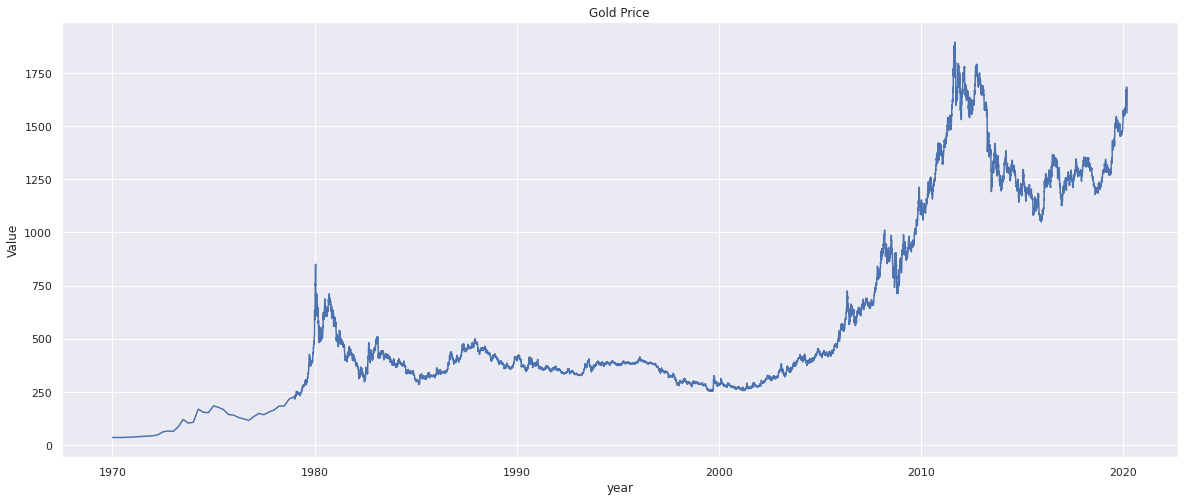

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.lineplot(data=df, x="Date", y="Value")
ax.set_title('Gold Price')
ax.set_xlabel('year');
ax.set_ylabel('Value');

**Identify feature and target**
* Target = `'Value'`
* Attribute/Feature = `'Date'` ,`'Value'`

**Train Test Split**

In [ ]:
def train_test_split_TS(dfTS, train_size):
    train, test = dfTS.iloc[:int(len(dfTS)*train_size)], dfTS.iloc[int(len(dfTS)*train_size):]
    return train, test 

In [ ]:
#เราได้ทำการแบ่งของมูลเอาไว้เรียนรูั 60% และข้อมูลเอาไว้ทดสอบ 40%
train_set, test_set = train_test_split_TS(df, train_size = 0.6)
print('Trainset size :', len(train_set))
print('Testset size  :', len(test_set))

Trainset size : 6472
Testset size  : 4315


**Feature Engineering**

**expand columns by time/days**

In [ ]:
# นำข้อมูลของวันถัดไป n วันมาต่อเพิ่ม column
def expand_column(dfTS, target_column_name, new_column_names):
  data_expanded = pd.DataFrame() # กำหนด DataFrame

  for i, name in enumerate(new_column_names): 
    data_expanded[name] = dfTS[target_column_name].shift(-i) # shift up 
    
  data_expanded.dropna(inplace = True)

  return data_expanded

window_size = 40
new_column_names = [f"Day{i+1}" for i in range(window_size)] + ['Target']

data_train = expand_column(train_set, 'Value',new_column_names)
data_test = expand_column(test_set, 'Value',new_column_names)

In [ ]:
data_train

,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,Day10,...,Day32,Day33,Day34,Day35,Day36,Day37,Day38,Day39,Day40,Target
0,35.2,35.10,35.40,36.20,37.40,38.90,40.10,42.00,43.50,48.30,...,155.50,165.00,183.40,183.30,217.10,226.00,226.00,226.80,218.60,223.15
1,35.1,35.40,36.20,37.40,38.90,40.10,42.00,43.50,48.30,62.10,...,165.00,183.40,183.30,217.10,226.00,226.00,226.80,218.60,223.15,225.50
2,35.4,36.20,37.40,38.90,40.10,42.00,43.50,48.30,62.10,65.50,...,183.40,183.30,217.10,226.00,226.00,226.80,218.60,223.15,225.50,223.10
3,36.2,37.40,38.90,40.10,42.00,43.50,48.30,62.10,65.50,63.90,...,183.30,217.10,226.00,226.00,226.80,218.60,223.15,225.50,223.10,224.00
4,37.4,38.90,40.10,42.00,43.50,48.30,62.10,65.50,63.90,84.40,...,217.10,226.00,226.00,226.80,218.60,223.15,225.50,223.10,224.00,220.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6427,346.0,350.20,351.50,349.40,351.30,348.15,347.20,344.15,343.40,343.70,...,360.10,358.65,363.60,364.50,360.25,360.40,363.70,363.30,358.75,358.75
6428,350.2,351.50,349.40,351.30,348.15,347.20,344.15,343.40,343.70,347.50,...,358.65,363.60,364.50,360.25,360.40,363.70,363.30,358.75,358.75,360.50
6429,351.5,349.40,351.30,348.15,347.20,344.15,343.40,343.70,347.50,348.25,...,363.60,364.50,360.25,360.40,363.70,363.30,358.75,358.75,360.50,371.25
6430,349.4,351.30,348.15,347.20,344.15,343.40,343.70,347.50,348.25,343.20,...,364.50,360.25,360.40,363.70,363.30,358.75,358.75,360.50,371.25,369.80


In [ ]:
data_test

,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,Day10,...,Day32,Day33,Day34,Day35,Day36,Day37,Day38,Day39,Day40,Target
6472,376.25,373.70,370.00,370.75,375.80,374.65,382.25,380.00,376.30,378.25,...,373.95,373.50,373.40,370.50,373.80,378.20,384.75,384.50,388.25,386.00
6473,373.70,370.00,370.75,375.80,374.65,382.25,380.00,376.30,378.25,373.50,...,373.50,373.40,370.50,373.80,378.20,384.75,384.50,388.25,386.00,384.40
6474,370.00,370.75,375.80,374.65,382.25,380.00,376.30,378.25,373.50,374.60,...,373.40,370.50,373.80,378.20,384.75,384.50,388.25,386.00,384.40,385.40
6475,370.75,375.80,374.65,382.25,380.00,376.30,378.25,373.50,374.60,374.25,...,370.50,373.80,378.20,384.75,384.50,388.25,386.00,384.40,385.40,386.50
6476,375.80,374.65,382.25,380.00,376.30,378.25,373.50,374.60,374.25,378.30,...,373.80,378.20,384.75,384.50,388.25,386.00,384.40,385.40,386.50,386.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10742,1549.90,1545.10,1549.00,1554.55,1557.60,1560.15,1551.30,1556.90,1562.90,1564.30,...,1650.30,1634.90,1652.00,1609.85,1599.65,1615.50,1641.85,1659.60,1683.65,1672.50
10743,1545.10,1549.00,1554.55,1557.60,1560.15,1551.30,1556.90,1562.90,1564.30,1580.10,...,1634.90,1652.00,1609.85,1599.65,1615.50,1641.85,1659.60,1683.65,1672.50,1655.70
10744,1549.00,1554.55,1557.60,1560.15,1551.30,1556.90,1562.90,1564.30,1580.10,1574.00,...,1652.00,1609.85,1599.65,1615.50,1641.85,1659.60,1683.65,1672.50,1655.70,1653.75
10745,1554.55,1557.60,1560.15,1551.30,1556.90,1562.90,1564.30,1580.10,1574.00,1573.45,...,1609.85,1599.65,1615.50,1641.85,1659.60,1683.65,1672.50,1655.70,1653.75,1570.70


**Now! new data contain only `Value` values!!**
* Target = column[`'Value'`] contains `Value` value of next day!
* Attribute/Feature = column[`'Day0'`...`'Day_n'`] contain `Value` value of previous days!

In [ ]:
X_train = data_train[data_train.columns[:-1]].values
y_train = data_train[data_train.columns[-1]].values

X_test = data_test[data_test.columns[:-1]].values
y_test = data_test[data_test.columns[-1]].values

**Modelling - Machine Learning**

กระบวนการ Machie learning ที่ออกแบบมาสำหรับ Time Series

ในการออกแบบโมเดลเพื่อนพยากรณ์ราคาของทอง เราได้ลองใช้แค่โมเดลเดียวคือโมเดล MLPRegressor โดยตัวของพารามิเตอร์ของโมเดลแรก ในส่วนของ activation ใส่เป็น 'logistic'เจ้าตัวของ logistic มันซึ่งเป็นฟังก์ชัน logistic sigmoid ส่งกลับค่า f(x) = 1 / (1 + exp (-x)) และในส่วนของ solver ใส่เป็น 'lbfgs' จะเป็นเครื่องมือที่มีประสิทธิภาพในตระกูลวิธีกึ่งนิวตันมันช่วยทำให้กระบวนการทำของโมเดลมีประสิทธิภาพมากขึ้นด้วย

[1564.30536074 1565.54660123 1566.01567968 ... 1566.14492453 1566.14492415
 1566.14492446]
MAE:  487.32318251287563
MSE:  362565.1963531325
MAPE:  0.7308600036574501


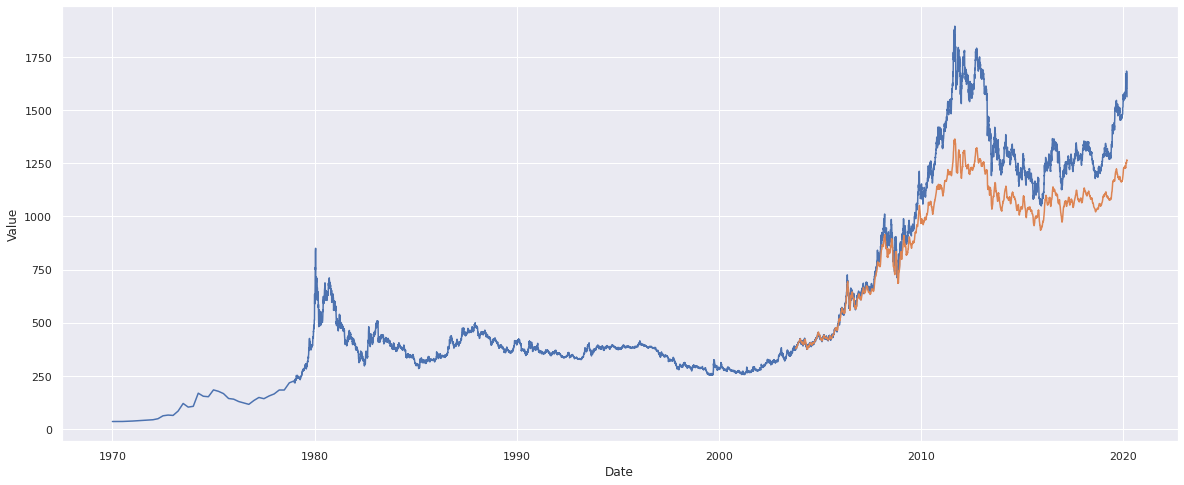

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.compose import TransformedTargetRegressor

scaler = MinMaxScaler()
scaler.fit(X_train)

# out_enc = output_encoder()
# out_enc.fit(target_train)

model = MLPRegressor(activation='logistic',solver='lbfgs')
model = TransformedTargetRegressor(regressor=model, transformer=MinMaxScaler())
model.fit(scaler.transform(X_train), y_train)
y_predict = model.predict(X_test)
print(y_predict)

preds = model.predict(scaler.transform(X_test))
preds_df = pd.DataFrame({'Date':test_set['Date'].values[window_size-1:-1], 'Predicted':preds})
sns.lineplot(x=df['Date'], y=df['Value'])
sns.lineplot(x=preds_df['Date'],  y=preds_df['Predicted']);

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print("MAE: ", mean_absolute_error(y_test, y_predict))
print("MSE: ", mean_squared_error(y_test, y_predict))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_predict))

ในส่วนโมเดลที่สอง เราใส่ค่าพารามิเตอร์ที่แตกต่างจากโมเดลแรกคือ ในส่วนของ activation ใส่เป็น 'identity' เป็นฟังก์ชันที่การเปิดใช้งาน no-op และคืนค่า f(x)=x ในส่วนของ solver ได้ใส่เป็น 'sgd' เป็นตัวแก้ปัญหาโดยไล่ลำดับสีสุ่ม ซึ่งมันก็ช่วยให้กระบวนการทำของโมเดลมีประสิทธิภาพมากขึ้นเช่นกัน

[ 270253.63340103  274561.05118162  269300.17735958 ... 1166320.20688114
 1172006.46743453 1169535.50241934]
MAE:  791694.1508260769
MSE:  707336599193.9656
MAPE:  726.1639165065667


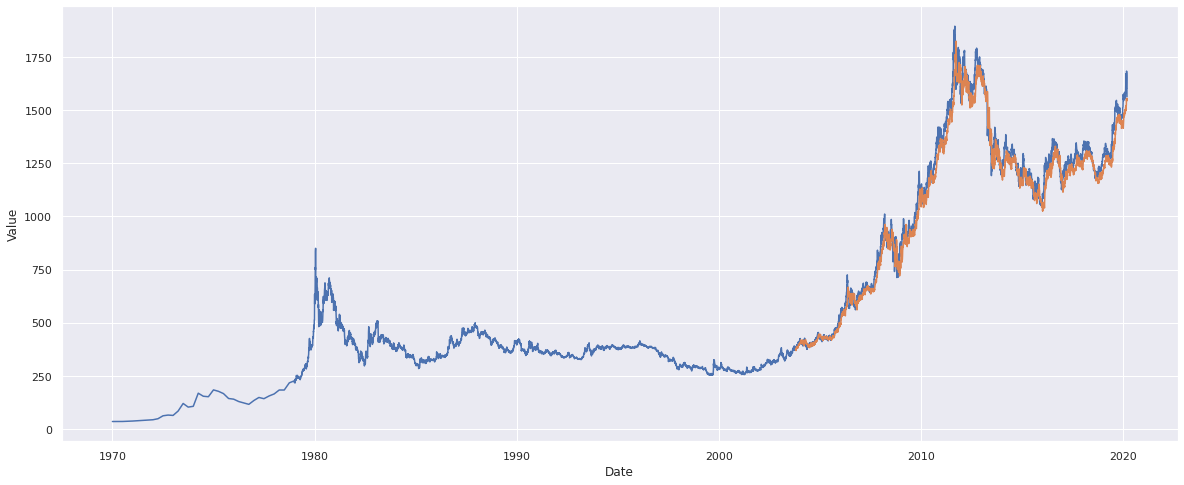

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.compose import TransformedTargetRegressor

scaler = MinMaxScaler()
scaler.fit(X_train)

# out_enc = output_encoder()
# out_enc.fit(target_train)

model = MLPRegressor(activation='identity',solver='sgd')
model = TransformedTargetRegressor(regressor=model, transformer=MinMaxScaler())
model.fit(scaler.transform(X_train), y_train)
y_predict = model.predict(X_test)
print(y_predict)
preds = model.predict(scaler.transform(X_test))
preds_df = pd.DataFrame({'Date':test_set['Date'].values[window_size-1:-1], 'Predicted':preds})
sns.lineplot(x=df['Date'], y=df['Value'])
sns.lineplot(x=preds_df['Date'],  y=preds_df['Predicted']);

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print("MAE: ", mean_absolute_error(y_test, y_predict))
print("MSE: ", mean_squared_error(y_test, y_predict))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_predict))

ในความแตกต่างระหว่างโมเดลเดียว แต่ค่าพารามิเตอร์ที่แตกต่างกัน โดยที่ค่าพยากรณ์ของโมเดลแรกนั้นในแต่ละตัวมีค่าพยากรณ์น้อยกว่าโมเดลที่สอง และกราฟที่ออกมาจากทั้งสองโมเดลนั้นมีความแม่นยำต่างกันด้วย

**วิเคราะห์ผล**

ในการพยากรณ์ราคาของทอง ซึ่งเป็นข้อมูลที่ได้มาจาก Kaggle ประกอบไปด้วย 2 แอตทริบิวต์ จากข้อมูลทั้งหมด 10787 แถวโดยกำหนด input ข้อมูลเป็น แอตทริบิวต์มีดังนี้

1.Date(วันที่)

2.Value(ราคาของทอง)
โดย output ที่เราจะหาหรือพยากรณ์ก็คือ Value(ราคาทอง) นั้นเอง
โดยเราได้ทำการนำข้อมูลมาทำความสะอาดเพื่อง่ายต่อการพยากรณ์ แล้วได้ทำการเเบ่งข้อมูลไว้สองชุด โดยชุดไว้เรียนรู้ 60% และชุดทดสอบ 40%  เราได้ใช้โมเดลที่เอาไว้เรียนรู้และทำการพยากรณ์เป็น MLPRegressor แค่โมเดลเดียวแต่ว่าเราได้ทำการให้ค่าพารามิเตอร์ที่แตกต่างกัน ผลปรากฎว่าค่าทองที่พยากรณ์ออกมาของโมเดลที่สองนั้นมีมากกว่าของโมเดลแรกทุกตัวในการพยากรณ์ออกมา จะเห็นได้ชัดเลยว่าการใช้โมเดลเดียวแต่ค่าพารามิเตอร์ที่แตกต่างกันนั้นทำให้ค่าพยากรณ์นั้นเปลี่ยนไปได้ และกราฟพยากรณ์ที่พล็อตออกมานั้นก็มีความแม่นยำที่แตกต่างกันด้วย

# **Clustering**

**เกี่ยวกับข้อมูล**
เป็นชุดข้อมูลคะแนนของนักเรียน ได้จาก [Kaggle](https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams) ซึ่งมีข้อมูลทั้งหมด 1000 แถว 8 แอททริบิวต์ ดังนี้ 
1. gender เพศ
2. race/ethnicity เชื้อชาติ/ชาติพันธุ์ 
3. parental level of education ระดับของการศึกษา
4. lunch อาหารกลางวัน
5. test preparation course คอร์สเตรียมสอบ 
6. math score คะแนนคณิตศาสตร์
7. reading score คะแนนการอ่าน
8. writing score คะแนนการเขียน

กำหนดข้อมูล

Input : gender,parental level of education,lunch, test preparation course, math score, reading score และ writig score

Output : race/ethnicity

**เพื่อทำการจำแนกกลุ่ม race/ethnicity ของนักเรียน**

**ตรวจสอบข้อมูล**

In [ ]:
# download ข้อมูล แล้วอัพลง Google Drive เพื่อให้ง่ายต่อการนำข้อมูลมาใช้งานใน Google Colab
!gdown --id 1_uz2xWuDYOeYW4YPhi6rA33L_8-ISFso #ใช้คำสั่ง !gdown --id <link id> เพื่อโหลดข้อมูลจาก Google Drive

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1_uz2xWuDYOeYW4YPhi6rA33L_8-ISFso
To: /content/exams.csv
100% 71.8k/71.8k [00:00<00:00, 46.7MB/s]


In [ ]:
import pandas as pd
exams = pd.read_csv("exams.csv")
exams

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [ ]:
exams.shape # dimension 

(1000, 8)

In [ ]:
exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
exams.isna().sum().sort_values() #ตรวจสอบหาข้อมูลที่เป็น null

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
exams.columns # ดูคอลัมน์

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
exams['gender'].value_counts() #ดูค่าข้อมูลของ gender

male      517
female    483
Name: gender, dtype: int64

In [ ]:
exams['race/ethnicity'].value_counts() #ดูค่าข้อมูลของ race/ethnicity

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race/ethnicity, dtype: int64

In [ ]:
exams['parental level of education'].value_counts() #ดูค่าข้อมูลของ parental level of education

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parental level of education, dtype: int64

In [ ]:
exams['lunch'].value_counts() #ดูค่าข้อมูลของ lunch

standard        652
free/reduced    348
Name: lunch, dtype: int64

In [ ]:
exams['test preparation course'].value_counts() #ดูค่าข้อมูลของ test preparation course

none         665
completed    335
Name: test preparation course, dtype: int64

**เตรียมข้อมูล**

In [ ]:
#split data ทำการแบ่งข้อมูลออกเป็น 2 ชุด คือ ข้อมูล train (ให้โมเดลเรียนรู้) และ ข้อมูล test (สำหรับทดสอบโมเดล)
from sklearn.model_selection import train_test_split # libraly ที่้ไช้เพื่อแยกข้อมูลออกเป็น 2 ส่วน

X = exams.drop('race/ethnicity', axis=1) # สำหรับแยกข้อมูล Input
y = exams['race/ethnicity'] # สำหรับแยกข้อมูล Output

#แยกข้อมูล train, test : ข้อมูล train 70 % และข้อมูล test 30 % 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [ ]:
print("input:")
print("train data : ", X_train.shape)
print("test data :", X_test.shape)
print("output:")
print("train data : ", y_train.shape)
print("test data :", y_test.shape)

input:
train data :  (700, 7)
test data : (300, 7)
output:
train data :  (700,)
test data : (300,)


**Model**
ใช้โมเดล 2 ตัว คือ KMeans และ DBSCAN

In [ ]:
#KMeans model
from sklearn.preprocessing import OrdinalEncoder #แปลงข้อมูลประเภทหมวดหมู่ ให้ข้อมูลเป็นข้อมูลเชิงปริมาณ
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans # โมเดล KMeans
from sklearn.decomposition import PCA

pipe = Pipeline([
    ('ord_encoder',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)), 
     ('minmax', MinMaxScaler()),
    ('pca',PCA(n_components=3)),
    ('kmeans',KMeans(n_clusters=5, random_state=0))
])

pipe.fit(X_train,y_train)
y_predict = pipe.predict(X_test)


In [ ]:
#วัดประสิทธิภาพ
from sklearn.metrics import homogeneity_score
from sklearn.metrics import mutual_info_score

print("homogeneity: ", homogeneity_score(y_test, y_predict))
print("mutual_info: ", mutual_info_score(y_test, y_predict))

homogeneity:  0.030700202104596532
mutual_info:  0.044478921148583886


In [ ]:
# DBSCAN Model
from sklearn.preprocessing import OrdinalEncoder #แปลงข้อมูลประเภทหมวดหมู่ ให้ข้อมูลเป็นข้อมูลเชิงปริมาณ
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN #โมเดล DBSCAN
from sklearn.decomposition import PCA
# DBSCAN - Density-Based Spatial Clustering of Applications with Noise
pipe = Pipeline([
    ('ord_encoder',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)), 
    ('pca',PCA(n_components=3)),
    ('DBSCAN',DBSCAN(eps=3, min_samples=2))
])

# pipe.fit(X_train,y_train)
y_predict = pipe.fit_predict(X_test)

In [ ]:
#วัดประสิทธิภาพ
from sklearn.metrics import homogeneity_score
from sklearn.metrics import mutual_info_score

print("homogeneity: ", homogeneity_score(y_test, y_predict)) 
print("mutual_info: ", mutual_info_score(y_test, y_predict))
#ยิ่งเข้าใกล้ 1 ยิ่งดี

homogeneity:  0.2861690209381055
mutual_info:  0.41460604311682026


**วิเคราะห์ผล**

การจำแนกกลุ่ม race/ethnicity ของนักเรียน รับมาจาก Kaggle ข้อมูลมี 8 แอตทริบิวต์ ทั้งหมด 100 แถว ซึ่งกำหนดข้อมูล Input คือgender (เพศ), parental level of education (ระดับของการศึกษา), lunch (อาหารกลางวัน), test preparation course (คอร์สเตรียมสอบ), math score (คะแนนคณิตศาสตร์), reading score (คะแนนการอ่าน), writig score (คะแนนการเขียน) และข้อมูล Output คือ race/ethnicity (เชื้อชาติ/ชาติพันธุ์) ในการจำแนกจะใช้โมเดล KMeans และ DBSCAN ในการเตรียมข้อมูล จะแยกเป็น 2 ชุด train 70% และ test 30% ของข้อมูลทั้งหมด ซึ่งจะรวบรวมการทำงานเป็นขั้นตอนไว้ใน pipeline ใช้ OrdinalEncoderเพื่อแปลงข้อมูลประเภทหมวดหมู่ ให้ข้อมูลเป็นข้อมูลเชิงปริมาณ ,MinMaxScaler เพื่อปรับขนาดของข้อมูลให้อยู่ในช่วงที่กำหนด และใช้ PCA เพื่อลดขนาด Matrix ข้อมูลให้เล็กลง ผลจากการวัดประสิทธิภาพของโมเดลได้ว่า การจำแนกกลุ่ม race/ethnicity ของนักเรียน โดยใช้โมเดล DBSCAN มีประสิทธิภาพดีกว่า KMeans